<a href="https://colab.research.google.com/github/khushi1k4/HeartDiseasePrediction_MLmodel/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work Flow:
Heart Data -> Data Preprocessing -> Train Test Split -> Logistic Regression(Binary classification: Yes or No) -> Trained Logistic model -> New Data (Accuracy)

## Feature Descriptions:
1. age: Age of the patient (Numeric).
2. sex: Gender of the patient. Values: 1 = male, 0 = female.
3. cp: Chest pain type. Values: 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic.
trestbps: Resting Blood Pressure (in mm Hg) (Numeric).
4. chol: Serum Cholesterol level (in mg/dl) (Numeric).
fbs: Fasting blood sugar > 120 mg/dl. Values: 1 = true, 0 = false.
5. restecg: Resting electrocardiographic results.
6. Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
7. thalach: Maximum heart rate achieved (Numeric).
8. exang: Exercise-induced angina. Values: 1 = yes, 0 = no.
9. oldpeak: ST depression induced by exercise relative to rest (Numeric).
10. slope: Slope of the peak exercise ST segment.
11. Values: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
12. ca: Number of major vessels (0-3) colored by fluoroscopy. Values: 0, 1, 2, 3.
13. thal: Thalassemia types. Values: 1 = Normal, 2 = Fixed defect, 3 = Reversible defect.
14. target: Outcome variable (heart attack risk). Values: 1 = more chance of heart attack, 0 = less chance of heart attack.


In [ ]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #splitting the model into train and test
from sklearn.linear_model import LogisticRegression #Algorithm used to perform model
from sklearn.metrics import accuracy_score #To Evaluate the model

## Data Collection and Processing

In [ ]:
#loading the csv data into pandas dataFrame
heart_data = pd.read_csv('/content/cleaned_merged_heart_dataset.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0
1887,53,1,0,110,335,0,1,143,1,3.0,1,1,3,0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [ ]:
heart_data.shape

(1888, 14)

In [ ]:
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exang,0
oldpeak,0


In this dataset we don't have the missing values. So we're not handling missinv values. But if it has then we can use fillna, ffill, bfill methods to handle it

## Statatical Measures of the data

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,54.354343,0.688559,1.135593,131.549258,246.855403,0.148305,0.597458,149.424258,0.331568,1.053761,1.421610,0.731462,2.662606,0.517479
std,9.081505,0.463205,1.103852,17.556985,51.609329,0.355496,0.638820,23.006153,0.470901,1.161344,0.619588,1.015735,1.249924,0.499827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [ ]:
# checking the distribution of target values
heart_data['target'].value_counts()

,count
target,
1,977
0,911


Since Here the 0 represents the healthy heart and 1 represents the defective heart.

## Data Visualization

Age distribution amon the heart patients

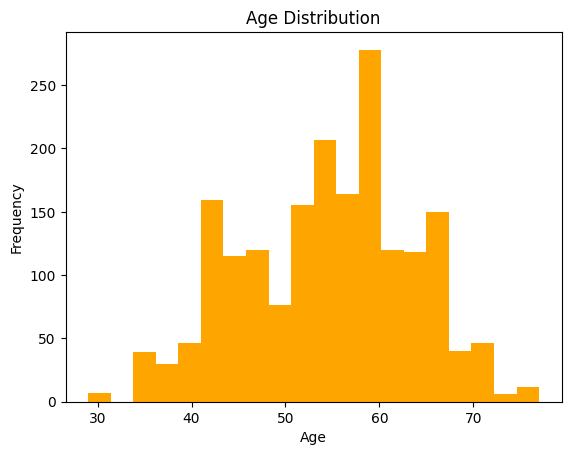

In [ ]:
plt.hist(heart_data['age'],bins=20,color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()

Gender Distribution among Heart Patients

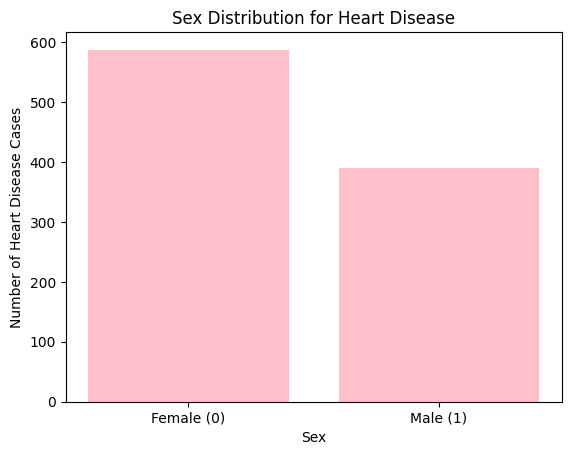

In [ ]:
sex_hd = heart_data[heart_data['target'] == 1]['sex'].value_counts()

# Labels
labels = ['Female (0)', 'Male (1)']

plt.bar(labels, sex_hd.values, color='pink')
plt.title("Sex Distribution for Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Number of Heart Disease Cases")
plt.show()

## Splitting the features and target for the prediction
Here we'll use the test_train_split

In [ ]:
X = heart_data.drop(columns='target', axis=1) # When we drop the cloumn axis will be 1
Y = heart_data['target']

In [ ]:
print(X)

      age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0      63    1   3       145   233  ...      0      2.3      0   0     1
1      37    1   2       130   250  ...      0      3.5      0   0     2
2      41    0   1       130   204  ...      0      1.4      2   0     2
3      56    1   1       120   236  ...      0      0.8      2   0     2
4      57    0   0       120   354  ...      1      0.6      2   0     2
...   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
1883   60    1   0       140   207  ...      1      1.9      2   1     3
1884   46    1   0       140   311  ...      1      1.8      1   2     3
1885   59    1   3       134   204  ...      0      0.8      2   2     2
1886   54    1   1       154   232  ...      0      0.0      2   1     2
1887   53    1   0       110   335  ...      1      3.0      1   1     3

[1888 rows x 13 columns]


In [ ]:
print(Y) # It contains all the target column's values

0       1
1       1
2       1
3       1
4       1
       ..
1883    0
1884    0
1885    0
1886    0
1887    0
Name: target, Length: 1888, dtype: int64


## Splitting the data into Training data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
#test_size represents the amount of data used for the testing of the data
# Generally we uses 10% or 20% of the data as test data so we uses test_size=0.2
# stratify help to get the even distribution of 0 and 1 in the test_data we'll going to use in it. Y is traget and we even distribution cases. So we're using strtify here.

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1888, 13) (1510, 13) (378, 13)


## Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# Now we're training the logisticRegrssion with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

Accuracy Score

In [ ]:
# We will see the accuracy of the prediction
# accuracy on training data
X_trainPrediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_trainPrediction, Y_train)

In [ ]:
print('Accuracy on predicted train data: ',training_data_accuracy)
# Out of 100 values, our model predicted the 76 values correct predicted values

Accuracy on predicted train data:  0.7649006622516556


In [ ]:
X_testPrediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_testPrediction, Y_test)

In [ ]:
print('Accuracy on predicted test data: ',testing_data_accuracy)
# Out of 100 values, our model predicted the 74 values correct predicted values

Accuracy on predicted test data:  0.746031746031746


If the values between the test and trained accuracy values are closed on then it is correct otherwise overfitting or overtrained model or overlearned.

Here The model is not overfitted.

## Building a Predictive System

In [ ]:
input_data = (44,1,1,120,263,0,1,173,0,0.0,2,0,3) #Tuple
feature_names = X.columns


# We need to process on input data as it is in tuple into numpy array
input_numpyArrData = np.asarray(input_data)

# Reshape the array
input_reshaped_numpyArr = input_numpyArrData.reshape(1,-1)

# prediction = model.predict(input_reshaped_numpyArr)

input_df = pd.DataFrame(input_reshaped_numpyArr, columns=feature_names)

prediction = model.predict(input_df)
print('Predicted Value of the model is: ',prediction) #If the result is 1, defective heart and if result is 0 then healthy heart.

if (prediction[0]==1):
  print("Person has defective heart and having heart disease.")
else:
  print("Person has healthy heart.")

Predicted Value of the model is:  [1]
Person has defective heart and having heart disease.
